In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

!sudo apt-get install -y fonts-nanum  # 나눔폰트
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
park = pd.read_csv('/content/서울공원요약.csv')
park.head()

,공원명,지역,경도,위도,면적,스케일,크기
0,남산도시자연공원,중구,126.990377,37.550140,896887,중형,7
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,913690,중형,7
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,84085,소형,3


In [4]:
# 자치구별 공원면적과 공원수 개별 
#park_gu = park.groupby('지역').면적.sum().to_frame()
#park_gu['개수'] = park.groupby('지역').면적.count().to_frame()

# 면적sum, 공원수 한번에
park_gu = park.groupby('지역').면적.agg(['sum','count'])
park_gu.columns = ['공원면적', '공원수']
park_gu #(26,2) 과천시 들어가서 26개

,공원면적,공원수
지역,,
강남구,372117,7
강동구,917390,7
강북구,3118902,4
강서구,1880233,9
과천시,913690,1
관악구,1051453,2
광진구,59505,2
구로구,1149572,4
금천구,57568,4


In [5]:
# 과천 drop
park_gu.drop(index='과천시', inplace=True)
park_gu

,공원면적,공원수
지역,,
강남구,372117,7
강동구,917390,7
강북구,3118902,4
강서구,1880233,9
관악구,1051453,2
광진구,59505,2
구로구,1149572,4
금천구,57568,4
노원구,6697219,2


# 구별 공원면적 비율 및 인당공원 면적비교

In [6]:
seoul_df = pd.read_csv('/content/서울시 인구와 면적.txt', sep='\t')
seoul_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,합계,"9,911,088",605.23,"16,376"
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"


In [7]:
# 합계 제거
seoul_df.drop(index=0, inplace=True)
seoul_df

,기간,지역,인구,면적,인구밀도(명/㎢)
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"
5,2020,광진구,"360,109",17.06,"21,105"
6,2020,동대문구,"357,014",14.22,"25,114"
7,2020,중랑구,"399,562",18.50,"21,603"
8,2020,성북구,"447,056",24.58,"18,190"
9,2020,강북구,"311,569",23.60,"13,202"
10,2020,도봉구,"327,361",20.65,"15,852"


In [8]:
seoul_df.set_index('지역', inplace=True)
seoul_df.head()

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"
용산구,2020,"244,645",21.87,"11,188"
성동구,2020,"300,505",16.86,"17,822"
광진구,2020,"360,109",17.06,"21,105"


In [9]:
# 공원요약과 인구면적 합치기
new_df = park_gu.join(seoul_df[['인구', '면적']])
new_df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,372117,7,"544,055",39.50
강동구,917390,7,"463,998",24.59
강북구,3118902,4,"311,569",23.60
강서구,1880233,9,"585,901",41.44
관악구,1051453,2,"509,803",29.57


In [10]:
new_df['면적'] = new_df.면적 * 1000000

In [11]:
new_df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,372117,7,"544,055",39500000.0
강동구,917390,7,"463,998",24590000.0
강북구,3118902,4,"311,569",23600000.0
강서구,1880233,9,"585,901",41440000.0
관악구,1051453,2,"509,803",29570000.0


In [12]:
# 인구데이터 쉼표 지우기
new_df['인구'] = new_df.인구.apply(lambda x: int(x.replace(',', '')))
new_df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,372117,7,544055,39500000.0
강동구,917390,7,463998,24590000.0
강북구,3118902,4,311569,23600000.0
강서구,1880233,9,585901,41440000.0
관악구,1051453,2,509803,29570000.0


In [13]:
new_df['인구대비'] = new_df['공원면적'] / new_df['인구'] * 100
new_df['면적대비'] = new_df['공원면적'] / new_df['면적'] * 100
new_df.head()

,공원면적,공원수,인구,면적,인구대비,면적대비
지역,,,,,,
강남구,372117,7,544055,39500000.0,68.396945,0.942068
강동구,917390,7,463998,24590000.0,197.714214,3.730744
강북구,3118902,4,311569,23600000.0,1001.030911,13.215686
강서구,1880233,9,585901,41440000.0,320.913089,4.537242
관악구,1051453,2,509803,29570000.0,206.246923,3.555810


# 시각화

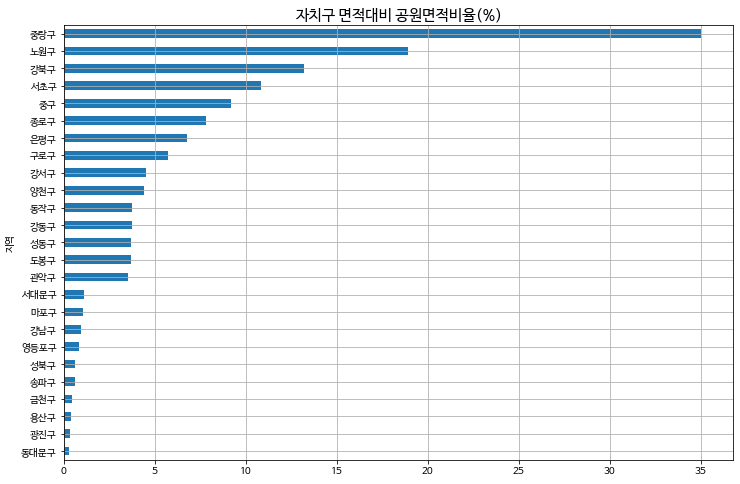

In [14]:
# 자치구별 공원 면적 비율
new_df.면적대비.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.rc('font', family='NanumBarunGothic')
plt.title('자치구 면적대비 공원면적비율(%)',size=15)
plt.show()

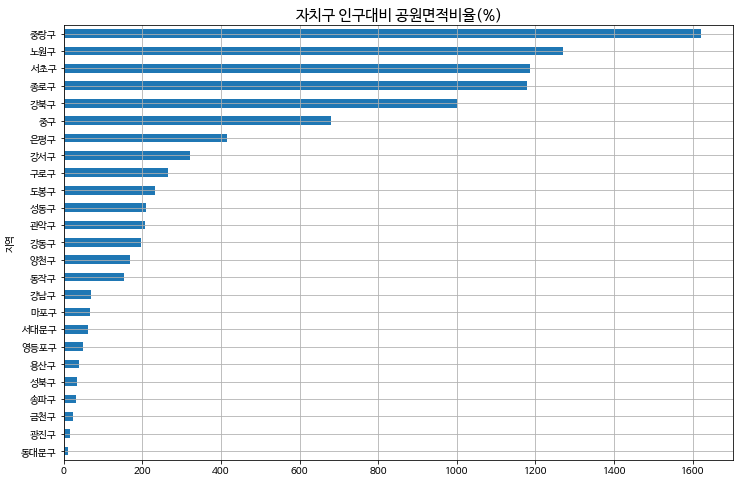

In [15]:
# 자치구별 공원 면적 비율
new_df.인구대비.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.rc('font', family='NanumBarunGothic')
plt.title('자치구 인구대비 공원면적비율(%)',size=15)
plt.show()

In [16]:
new_df.to_csv('자치구별 공원 현황.csv')  # 이경우는 index=False 하지말기